## Pruebas del modulo de acceso a los datos de contador

In [1]:
import pandas as pd
from kwhmeter import contador, timezone, append_prices, read_config
from datetime import datetime, timedelta
import seaborn as sns


In [2]:
credenciales=read_config()
connection = contador(**credenciales['alarcon'])
#connection = contador(iberdrola,user,password)  #equivalente

Existen 6 facturas. Desde: 2022-06-15 00:00:00+02:00 hasta:2022-11-24 00:00:00+01:00


In [3]:

to_day = timezone.localize(datetime(2022,12,16)-timedelta(days=0))
from_day=to_day-timedelta(days=30)

print(f'Recuperando datos desde: {from_day} hasta:{to_day}')


Recuperando datos desde: 2022-11-16 00:00:00+01:00 hasta:2022-12-16 00:00:00+01:00


In [4]:
facturas=connection.facturas()
facturas

,fechaInicio,fechaFin
factura,,
2022-06-25,2022-06-15 00:00:00+02:00,2022-06-24 00:00:00+02:00
2022-07-25,2022-06-25 00:00:00+02:00,2022-07-24 00:00:00+02:00
2022-08-25,2022-07-25 00:00:00+02:00,2022-08-24 00:00:00+02:00
2022-09-25,2022-08-25 00:00:00+02:00,2022-09-24 00:00:00+02:00
2022-10-25,2022-09-25 00:00:00+02:00,2022-10-24 00:00:00+02:00
2022-11-25,2022-10-25 00:00:00+02:00,2022-11-24 00:00:00+01:00


In [5]:
cc=connection.consumo(from_day,to_day)
#cc=connection.consumo_facturado(['2022-11-25'])
cc=append_prices(cc)


INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:root:recovering missing dates:0


In [6]:
cc

,consumo,tipo,periodo,factura,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB
fecha,,,,,,,,,,
2022-11-16 01:00:00+01:00,0.0,R,P3,2022-11-25,131.66,3.56,3.03,0.000000,0.000000,0.000000
2022-11-16 02:00:00+01:00,0.0,R,P3,2022-11-25,129.61,3.96,3.03,0.000000,0.000000,0.000000
2022-11-16 03:00:00+01:00,0.0,R,P3,2022-11-25,127.23,3.04,3.03,0.000000,0.000000,0.000000
2022-11-16 04:00:00+01:00,0.0,R,P3,2022-11-25,128.41,4.15,3.03,0.000000,0.000000,0.000000
2022-11-16 05:00:00+01:00,0.0,R,P3,2022-11-25,131.03,5.00,3.03,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2022-12-14 11:00:00+01:00,217.0,R,P1,en curso,203.45,12.21,74.41,0.044149,0.002650,0.016147
2022-12-14 12:00:00+01:00,193.0,R,P1,en curso,201.74,9.50,74.41,0.038936,0.001834,0.014361
2022-12-14 13:00:00+01:00,155.0,R,P1,en curso,203.21,10.85,74.41,0.031498,0.001682,0.011534


<AxesSubplot:xlabel='fecha'>

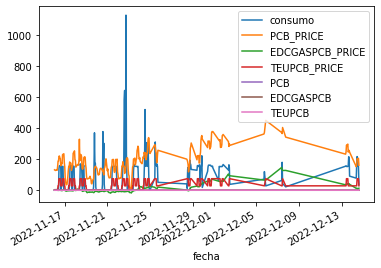

In [7]:
cc.plot()

In [8]:
cc.to_csv('consumos.csv',decimal=',')


In [9]:
totales=cc.groupby(['factura'])[['consumo','PCB','EDCGASPCB','TEUPCB']].sum()
totales

,consumo,PCB,EDCGASPCB,TEUPCB
factura,,,,
2022-11-25,12818.0,2.219168,-0.071330,0.608379
en curso,14048.0,3.768686,0.512948,0.780881


In [10]:
cc['2022-08-25':'2022-09-30']['consumo'].sum()+cc['2022-10-01':'2022-10-24']['consumo'].sum()

0.0

In [11]:
cc.groupby(['factura','tipo']).sum()

,,consumo,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB
factura,tipo,,,,,,,
2022-11-25,R,12818.0,27872.77,-1043.65,5229.12,2.219168,-0.071330,0.608379
en curso,R,14048.0,28343.30,4035.82,5352.00,3.768686,0.512948,0.780881


In [12]:
cc.groupby(['factura','periodo']).sum()

consumo  PCB_PRICE  EDCGASPCB_PRICE  TEUPCB_PRICE  \
factura    periodo                                                      
2022-11-25 P1        6326.0   10173.24          -145.56       3571.68   
           P2        4638.0    7587.56          -196.01       1366.56   
           P3        1854.0   10111.97          -702.08        290.88   
en curso   P1        8292.0   15709.24          1983.11       4018.14   
           P2        5756.0   11143.98          1886.48       1309.62   
           P3           0.0    1490.08           166.23         24.24   

                         PCB  EDCGASPCB    TEUPCB  
factura    periodo                                 
2022-11-25 P1       1.305188  -0.023853  0.470718  
           P2       0.675111  -0.031926  0.132044  
           P3       0.238869  -0.015551  0.005618  
en curso   P1       2.368440   0.273319  0.617008  
           P2       1.400246   0.239629  0.163873  
           P3       0.000000   0.000000  0.000000

In [13]:
cc.groupby(['factura','periodo','tipo']).sum()

consumo  PCB_PRICE  EDCGASPCB_PRICE  TEUPCB_PRICE  \
factura    periodo tipo                                                      
2022-11-25 P1      R      6326.0   10173.24          -145.56       3571.68   
           P2      R      4638.0    7587.56          -196.01       1366.56   
           P3      R      1854.0   10111.97          -702.08        290.88   
en curso   P1      R      8292.0   15709.24          1983.11       4018.14   
           P2      R      5756.0   11143.98          1886.48       1309.62   
           P3      R         0.0    1490.08           166.23         24.24   

                              PCB  EDCGASPCB    TEUPCB  
factura    periodo tipo                                 
2022-11-25 P1      R     1.305188  -0.023853  0.470718  
           P2      R     0.675111  -0.031926  0.132044  
           P3      R     0.238869  -0.015551  0.005618  
en curso   P1      R     2.368440   0.273319  0.617008  
           P2      R     1.400246   0.239629  0.163873  
           P3      R     0.000000   0.000000  0.000000

<AxesSubplot:xlabel='factura', ylabel='consumo'>

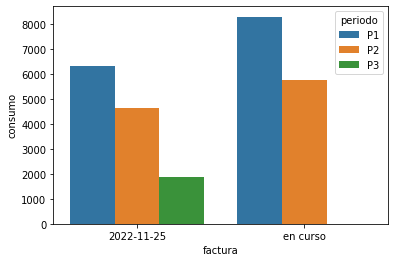

In [14]:
sns.barplot(data=cc.groupby(['factura','periodo']).sum().reset_index(),x='factura',y='consumo',hue='periodo')